# Lab 01 : MNIST multi-layer -- demo

In [1]:
import sys, os

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import utils

### Download the data

In [3]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()

train_data = torch.load(data_path+'mnist/train_data.pt')
train_label = torch.load(data_path+'mnist/train_label.pt')
test_data = torch.load(data_path+'mnist/test_data.pt')
test_label = torch.load(data_path+'mnist/test_label.pt')

### Make a two layer net class

In [4]:
class two_layer_net(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(two_layer_net, self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size, bias = False)
        self.layer2 = nn.Linear(hidden_size, output_size, bias = False)
        
    def forward(self, x):
        y = self.layer1(x)
        y_hat = F.relu(y)
        scores = self.layer2(y_hat)
        
        return scores

### Build the net (recall that a one layer net had 7840 parameters)

In [5]:
net = two_layer_net(784,50,10)

print(net)
utils.display_num_param(net)

two_layer_net(
  (layer1): Linear(in_features=784, out_features=50, bias=False)
  (layer2): Linear(in_features=50, out_features=10, bias=False)
)
There are 39700 (0.04 million) parameters in this neural network


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)

bs = 20

### Evaluate on test set

In [9]:
def eval_on_test_set():
    
    running_error = 0
    num_batches = 0
    
    for i in range(0, 10000, bs):
        
        minibatch_data = test_data[i:i+bs]
        minibatch_label = test_label[i:i+bs]
        
        inputs = minibatch_data.view(bs, 784)
        
        scores = net(inputs)
        
        error = utils.get_error(scores.detach(), minibatch_label)
        
        running_error += error.item()
        
        num_batches += 1
        
    total_error = running_error / num_batches
    print('test error = ', total_error * 100, 'percent')

### Training loop

In [10]:
start = time.time()

for epoch in range(200):
    
    running_error = 0
    running_loss = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(60000)
    
    for count in range(0, 60000, bs):
        
        optimizer.zero_grad()
        
        indices = shuffled_indices[count:count+bs]
        minibatch_data = train_data[indices]
        minibatch_label = train_label[indices]
        
        inputs = minibatch_data.view(bs, 784)
        
        inputs.requires_grad_()
        
        scores = net(inputs)
        
        loss = criterion(scores, minibatch_label)
        
        loss.backward()
        
        optimizer.step()
        
        # compute some stats
        
        running_loss += loss.detach().item()
        
        error = utils.get_error(scores.detach(), minibatch_label)
        running_error += error.item()
        
        num_batches += 1
        
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats
    # and compute the error rate on the test set
    
    if epoch % 5 == 0 :
        
        print(' ')
        
        print('epoch=', epoch, '\t time=', elapsed_time, '\t loss=', total_loss, '\t error=', total_error*100, 'percent')
        
        eval_on_test_set()

 
epoch= 0 	 time= 3.0836031436920166 	 loss= 0.696904651624461 	 error= 16.731666855017345 percent
test error =  9.870000433921813 percent
 
epoch= 5 	 time= 13.714733839035034 	 loss= 0.2118002499345069 	 error= 5.935000711679458 percent
test error =  5.770000576972961 percent
 
epoch= 10 	 time= 27.618032217025757 	 loss= 0.15499164517239358 	 error= 4.320000716050465 percent
test error =  4.520000576972961 percent
 
epoch= 15 	 time= 39.64015460014343 	 loss= 0.12130829802015797 	 error= 3.333333977063497 percent
test error =  3.780000555515289 percent
 
epoch= 20 	 time= 51.49605965614319 	 loss= 0.09989201838352407 	 error= 2.791667240858078 percent
test error =  3.190000534057617 percent
 
epoch= 25 	 time= 63.23140573501587 	 loss= 0.08511769453141217 	 error= 2.3650004943211873 percent
test error =  3.01000052690506 percent
 
epoch= 30 	 time= 75.00600528717041 	 loss= 0.07412115502830906 	 error= 2.0866671164830524 percent
test error =  2.790000522136688 percent
 
epoch= 35 	

### Choose image at random from the test set and see how good/bad are the predictions

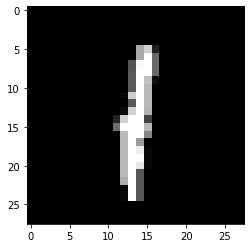

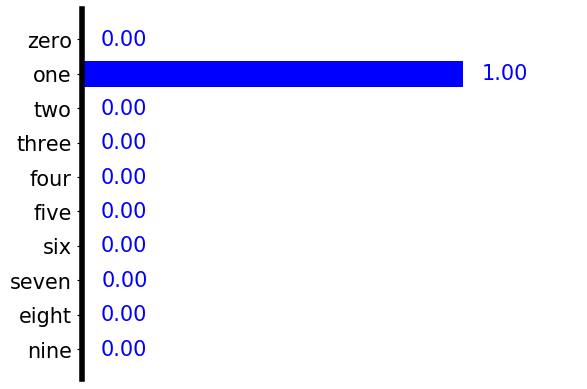

In [13]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# display the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1, 784))
prob = F.softmax(scores, dim=1)
utils.show_prob_mnist(prob)